<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Pandasassignment_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from geopy.distance import vincenty
import datetime
import time

### Введение

#### Загрузите csv файл в датафрейм https://s3.amazonaws.com/tripdata/index.html

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

citybike=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/202006-citibike-tripdata.csv')


In [4]:
citybike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1062,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2
1,3810,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2
3,226,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2


1. Найти общее количество строк и столбцов в датасете - указать первым число строк, вторым - число столбцов

In [5]:
citybike.shape

(1882273, 15)

Найти среднюю длину поездок в минутах(столбец tripduration) c точностью до 2 знака

In [6]:
citybike['stoptime1'] = pd.to_datetime(citybike['stoptime'], errors='coerce')
citybike['starttime1'] = pd.to_datetime(citybike['starttime'], errors='coerce')
citybike['tripduration'] = (citybike['stoptime1'] - citybike['starttime1']).dt.total_seconds() / 60
round(citybike.describe()['tripduration']['mean'], 2)

27.33

Сколько поездок начались и закончились в той же самой станции?

In [7]:
citybike[(citybike['start station id'] == citybike['end station id'])].shape

(124403, 17)

Сколько поездок начались и закончились в той же самой станции? Указать количество уникальных байков

In [8]:
citybike[(citybike['start station id'] == citybike['end station id'])]['bikeid'].unique().shape

(15511,)

Какой самый используемый байк(bikeid) в городе по количеству поездок? 

In [9]:
citybike['bikeid'].value_counts()[:1]

37634    333
Name: bikeid, dtype: int64

Найдите байк(bikeid), у которого в среднем продолжительность поездок выше, чем у всех остальных

In [10]:
citybike.groupby('bikeid')['tripduration'].mean().sort_values(ascending=False)[:1]

bikeid
17326    43466.807067
Name: tripduration, dtype: float64

Найдите количество строк, в которых отсутствуют данные о start station id

In [11]:
citybike[citybike['start station id'].isnull()].shape

(0, 17)

Какова средняя продолжительность поездки в зависимости от типа подписки c точностью до 2 знака? 

In [12]:
round(citybike.groupby('usertype')['tripduration'].mean(),2)

usertype
Customer      43.59
Subscriber    20.16
Name: tripduration, dtype: float64

Для каждой станции найдите расстояние между станциями, а затем найдите среднее расстояние по всем поездкам, предварительно выкинув замкнутые траектории(те у которых совпадают start station id = end station id). 

Hint: можно воспользоваться библиотекой geopy и взять расстояние vincenty(минимальное расстояние между точками)


In [13]:
#citybike['distance_km'] = citybike.apply(lambda x: vincenty((x['start station latitude'], x['start station longitude']),                                                             (x['end station latitude'], x['end station longitude'])).kilometers, axis=1)

#print(citybike['distance_km'].mean())



In [14]:
citybike['end station name'].value_counts()[:5]

12 Ave & W 40 St               12354
West St & Chambers St          11167
1 Ave & E 68 St                10924
Broadway & W 60 St              9653
Pier 40 - Hudson River Park     9545
Name: end station name, dtype: int64

Выберите станцию (start station id) с максимальным количеством отправлений с 18 до 20 вечера

In [15]:
citybike['start station name'].value_counts()[:5]

12 Ave & W 40 St               12245
1 Ave & E 68 St                10956
West St & Chambers St          10895
Broadway & W 60 St              9647
Pier 40 - Hudson River Park     9491
Name: start station name, dtype: int64

In [74]:
citybike

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,stoptime1,starttime1,end_hour,q,start_hour
0,17.713933,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,0,2020-06-01 00:17:46.208,2020-06-01 00:00:03.372,0,1,0
1,63.506383,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,2020-06-01 01:03:33.936,2020-06-01 00:00:03.553,1,1,0
2,16.953650,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,0,2020-06-01 00:17:06.833,2020-06-01 00:00:09.614,0,1,0
3,3.778100,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,2020-06-01 00:03:58.864,2020-06-01 00:00:12.178,0,1,0
4,23.961833,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,0,2020-06-01 00:24:18.965,2020-06-01 00:00:21.255,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882268,11.427717,2020-06-30 23:59:41.1160,2020-07-01 00:11:06.7790,503,E 20 St & Park Ave,40.738274,-73.987520,3746,6 Ave & Broome St,40.724308,-74.004730,21056,Customer,1993,0,2020-07-01 00:11:06.779,2020-06-30 23:59:41.116,0,30,23
1882269,7.444333,2020-06-30 23:59:46.4260,2020-07-01 00:07:13.0860,3699,W 50 St & 9 Ave,40.763605,-73.989180,523,W 38 St & 8 Ave,40.754666,-73.991382,30164,Customer,1969,0,2020-07-01 00:07:13.086,2020-06-30 23:59:46.426,0,30,23
1882270,7.318033,2020-06-30 23:59:47.4770,2020-07-01 00:07:06.5590,3699,W 50 St & 9 Ave,40.763605,-73.989180,523,W 38 St & 8 Ave,40.754666,-73.991382,43742,Customer,1986,0,2020-07-01 00:07:06.559,2020-06-30 23:59:47.477,0,30,23
1882271,14.833867,2020-06-30 23:59:53.3950,2020-07-01 00:14:43.4270,3852,Stewart Ave & Johnson Ave,40.708690,-73.925870,3054,Greene Ave & Throop Ave,40.689493,-73.942061,15787,Subscriber,1994,0,2020-07-01 00:14:43.427,2020-06-30 23:59:53.395,0,30,23


In [17]:
citybike['end_hour'] = citybike['stoptime'].apply(lambda x: datetime.datetime.fromtimestamp(
            time.mktime(datetime.datetime.strptime(x.strip(), "%Y-%m-%d %H:%M:%S.%f").timetuple())).hour)

In [18]:
citybike['q'] = citybike['starttime'].apply(lambda x: datetime.datetime.fromtimestamp(
            time.mktime(datetime.datetime.strptime(x.strip(), "%Y-%m-%d %H:%M:%S.%f").timetuple())).day)

In [19]:
citybike['start_hour'] = citybike['starttime'].apply(lambda x: datetime.datetime.fromtimestamp(
                                        time.mktime(datetime.datetime.strptime(x.strip(), "%Y-%m-%d %H:%M:%S.%f").timetuple())).hour)

In [20]:
citybike[(citybike.start_hour.isin([18, 19, 20]))]['start station id'].value_counts().head()

514     3218
426     2970
3256    2850
499     2256
358     2236
Name: start station id, dtype: int64

Выберите станции(end station id), в которые приезжают с 6 до 10 утра


In [21]:
end_stations = [3140, 3106, 3116, 369]

In [22]:
citybike[(citybike.end_hour.isin([6,7,8,9,10])) &
         (citybike['end station id'].isin(end_stations))]['end station id'].unique()

array([3140,  369, 3106, 3116])

In [73]:
a=citybike['q'].value_counts()
np.array(a)
a.sum()

1882273

In [24]:
citybike['gender']=0

In [48]:
rng = pd.date_range("2020-06-01", periods=100, freq="D") + pd.Timedelta("1h")

In [82]:
pp=citybike.resample('H', on='starttime1').gender.value_counts()
pp.sum()

ValueError: ignored

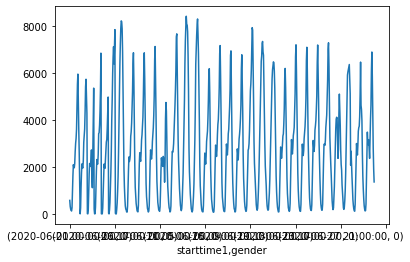

In [75]:
pp.plot()

In [76]:
pp.head


<bound method NDFrame.head of starttime1           gender
2020-06-01 00:00:00  0          577
2020-06-01 01:00:00  0          322
2020-06-01 02:00:00  0          206
2020-06-01 03:00:00  0          153
2020-06-01 04:00:00  0          125
                               ... 
2020-06-30 19:00:00  0         5856
2020-06-30 20:00:00  0         4407
2020-06-30 21:00:00  0         2809
2020-06-30 22:00:00  0         1914
2020-06-30 23:00:00  0         1364
Name: gender, Length: 675, dtype: int64>

In [81]:
pp['starttime1'] = pd.to_datetime(pp['starttime1'])

KeyError: ignored